In [ ]:
# The import order is important
import matplotlib as mpl 
mpl.use('cairo') 
%matplotlib inline 
import matplotlib.pyplot as plt

import graph_tool.all as gt

from scipy import sparse

import numpy as np
import pandas as pd

In [88]:
#TO READ

t = 3
i = 0

#EDGE_LIST
adj = sparse.load_npz(f"networks/adj_matrix_type_{str(t)}_run_{str(i)}.npz")
edge_list = np.column_stack((adj.row,adj.col,adj.data))
el_dataframe = pd.DataFrame(edge_list,columns = ['source','target','is_link'])


#NODE_LIST
df_nodes = pd.read_csv(f"networks/nodelist_{str(t)}_run_{str(i)}.csv")

edges = el_dataframe.to_numpy()
#define graph as directed
G = gt.Graph(directed=True)

#add the edge list to the graph, vertices are added with the number label
G.add_edge_list(edges)

vprop_label = G.new_vertex_property("double")            
v = G.vertex(10)
for v in G.iter_vertices():
    label = df_nodes[df_nodes.node_id==v]['group']
    vprop_label[v] = label.values[0]
    
vertices = G.get_vertices()
indeg = G.get_in_degrees(vertices)
outdeg = G.get_out_degrees(vertices)

#get connected components with a histogram of the belonging nodes
comp, hist = gt.label_components(G,directed = True)

#check which connected components have more than 1 node (in our case one)
print(np.where(hist>10))

#Restrict the graph to nodes that belong to the connected component
u =gt. GraphView(G, vfilt=comp.a == np.where(hist>10)[0])

#check vertices and edges 

print('total number of vertices',G.num_vertices())
print('total number of edges',G.num_edges())
print('number of vertices in connected component',u.num_vertices())
print('number of edges in connected component',u.num_edges())

(array([3]),)
total number of vertices 2000
total number of edges 5997
number of vertices in connected component 674
number of edges in connected component 2694


In [89]:
df_nodes.head()

,node_id,group
0,405,0
1,1190,0
2,1132,0
3,731,0
4,1754,0


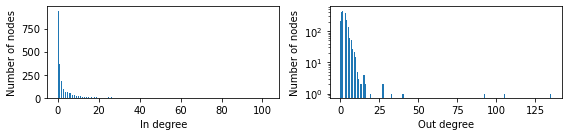

In [90]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,2))
ind = ax1.hist(indeg,bins= 200)
outd = ax2.hist(outdeg,bins= 200)
ax2.set_yscale('log')
ax1.set_xlabel('In degree')
ax1.set_ylabel('Number of nodes')

ax2.set_xlabel('Out degree')
ax2.set_ylabel('Number of nodes')

plt.tight_layout()

In [91]:
#pos = gt.fruchterman_reingold_layout(u, n_iter=1000,grid=True)
pos = gt.sfdp_layout(u)


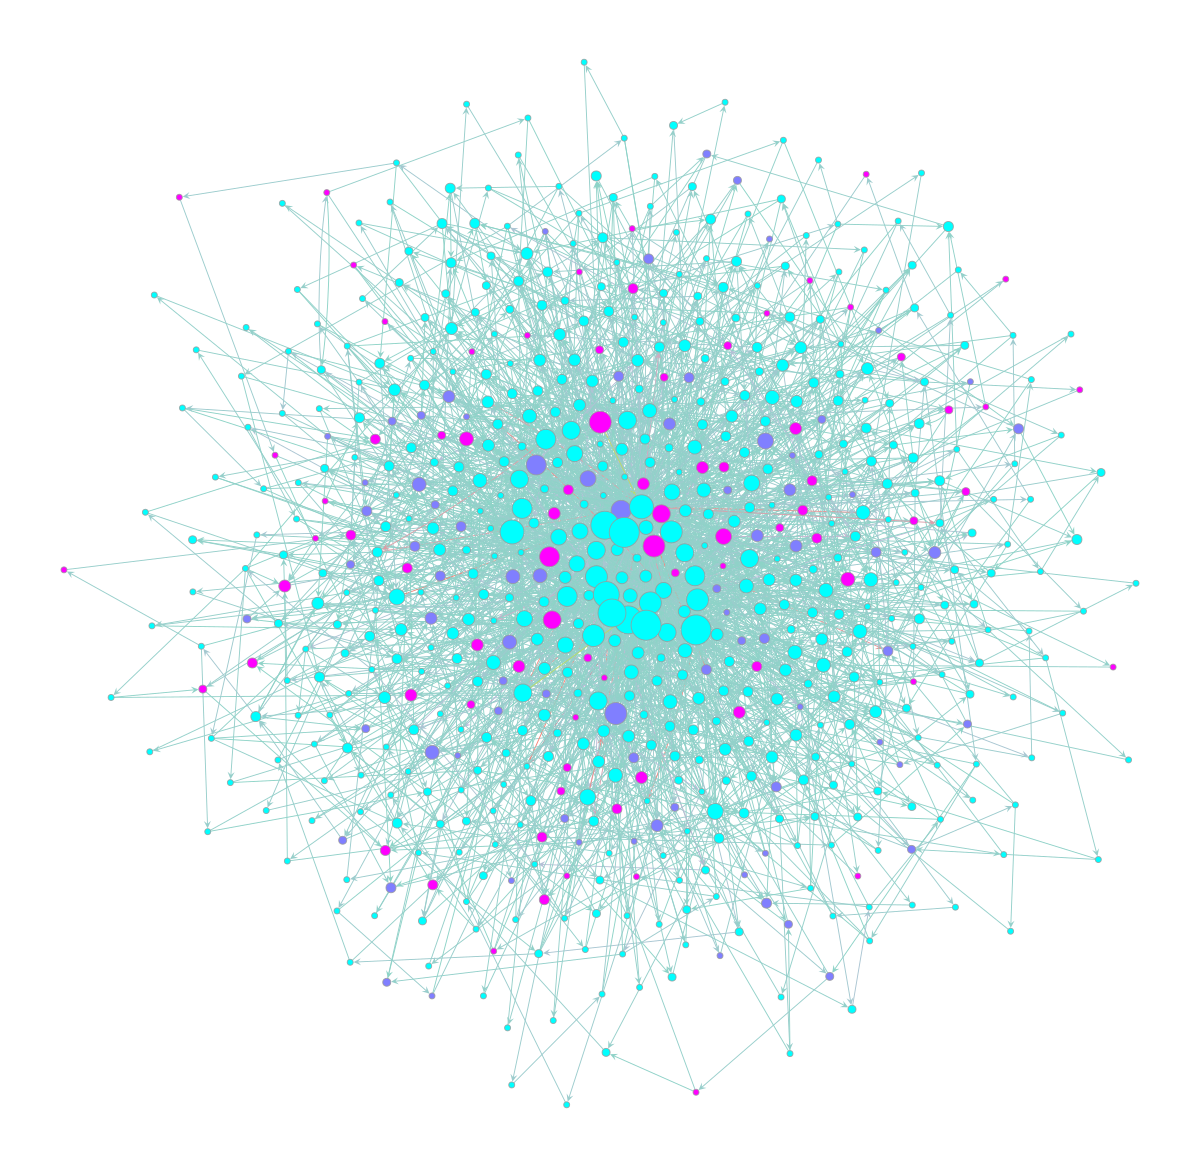

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd18e433730, at 0x7fd18e32ed10>

In [92]:
pos = gt.sfdp_layout(u)
deg = u.degree_property_map("in")
deg.a = 4 * (np.sqrt(deg.a) * 0.5 + 0.4)
ebet = gt.betweenness(u)[1]
ebet.a /= ebet.a.max() / 10.
eorder = ebet.copy()
eorder.a *= -1
gt.graph_draw(u, pos=pos, vertex_size=deg, vertex_fill_color=vprop_label, vorder=deg,
              edge_color=ebet,vcmap=plt.get_cmap('cool'))

## EXPERIMENT 9

In [66]:
#TO READ

t = 9
i = 0

#EDGE_LIST
adj = sparse.load_npz(f"networks/adj_matrix_type_{str(t)}_run_{str(i)}.npz")
edge_list = np.column_stack((adj.row,adj.col,adj.data))
el_dataframe = pd.DataFrame(edge_list,columns = ['source','target','is_link'])


#NODE_LIST
df_nodes = pd.read_csv(f"networks/nodelist_{str(t)}_run_{str(i)}.csv")

edges = el_dataframe.to_numpy()
#define graph as directed
G = gt.Graph(directed=True)

#add the edge list to the graph, vertices are added with the number label
G.add_edge_list(edges)

vprop_label = G.new_vertex_property("double")            
v = G.vertex(10)
for v in G.iter_vertices():
    label = df_nodes[df_nodes.node_id==v]['group']
    vprop_label[v] = label.values[0]
    
vertices = G.get_vertices()
indeg = G.get_in_degrees(vertices)
outdeg = G.get_out_degrees(vertices)

#get connected components with a histogram of the belonging nodes
comp, hist = gt.label_components(G,directed = True)

#check which connected components have more than 1 node (in our case one)
print(np.where(hist>10))

#Restrict the graph to nodes that belong to the connected component
u =gt. GraphView(G, vfilt=comp.a == np.where(hist>10)[0])

#check vertices and edges 

print('total number of vertices',G.num_vertices())
print('total number of edges',G.num_edges())
print('number of vertices in connected component',u.num_vertices())
print('number of edges in connected component',u.num_edges())

(array([3]),)
total number of vertices 2000
total number of edges 5997
number of vertices in connected component 674
number of edges in connected component 2694


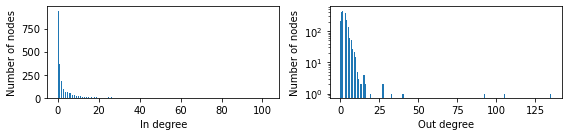

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,2))
ind = ax1.hist(indeg,bins= 200)
outd = ax2.hist(outdeg,bins= 200)
ax2.set_yscale('log')
ax1.set_xlabel('In degree')
ax1.set_ylabel('Number of nodes')

ax2.set_xlabel('Out degree')
ax2.set_ylabel('Number of nodes')

plt.tight_layout()

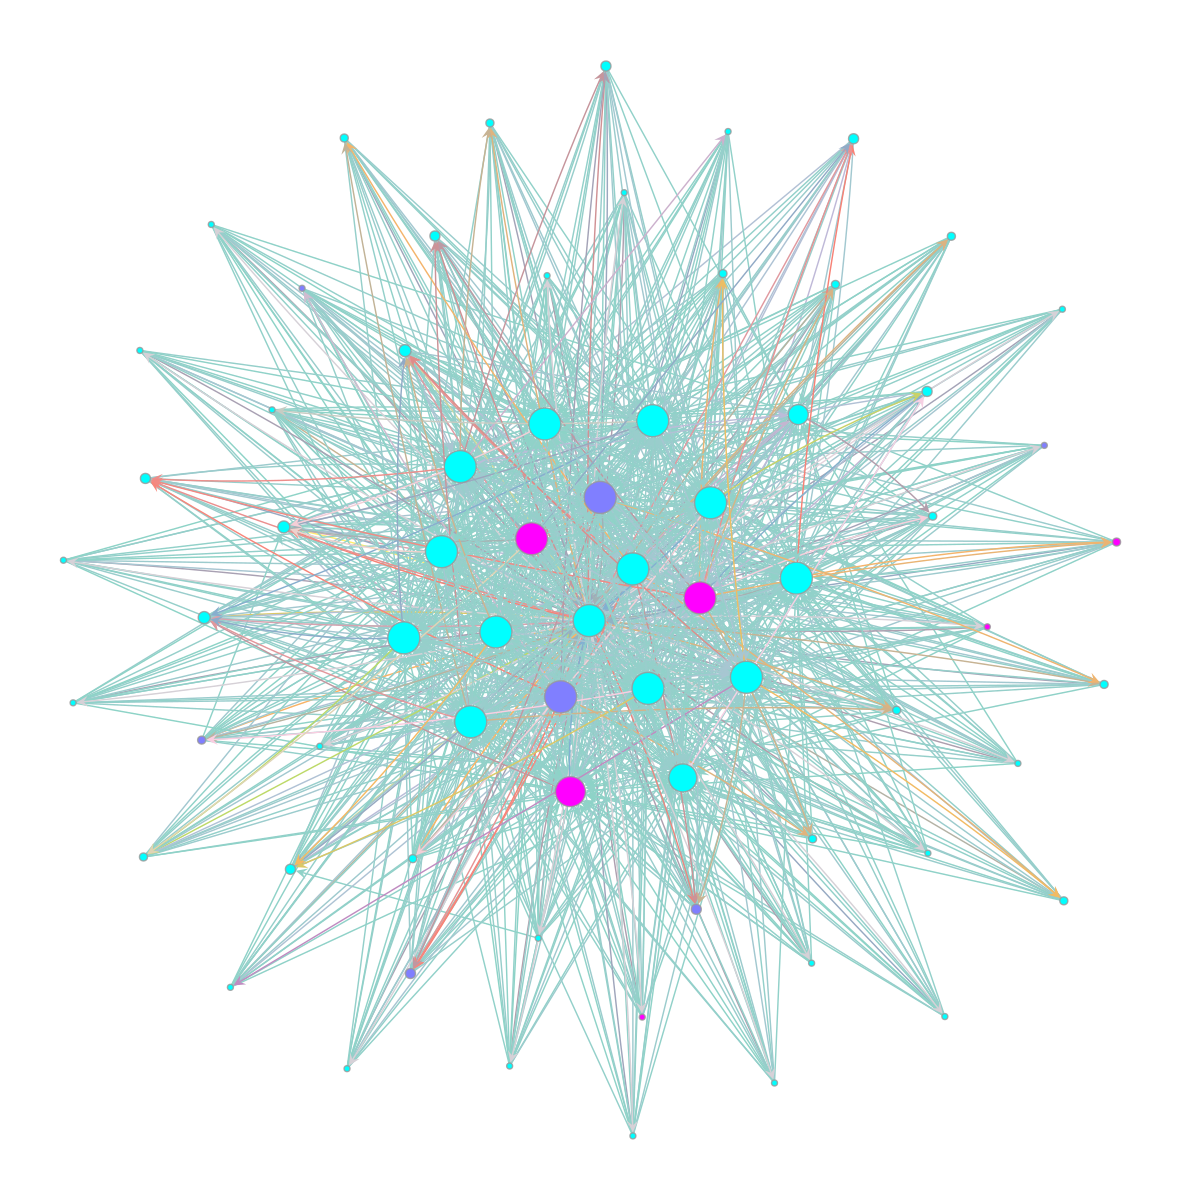

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd18e14d270, at 0x7fd19e33cc10>

In [57]:
pos = gt.sfdp_layout(u)
deg = u.degree_property_map("in")
deg.a = 4 * (np.sqrt(deg.a) * 0.5 + 0.4)
ebet = gt.betweenness(u)[1]
ebet.a /= ebet.a.max() / 10.
eorder = ebet.copy()
eorder.a *= -1
gt.graph_draw(u, pos=pos, vertex_size=deg, vertex_fill_color=vprop_label, vorder=deg,
              edge_color=ebet,vcmap=plt.get_cmap('cool'))

In [ ]:
#### 